Predict The Flight Ticket Price 
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket


https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects


In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [75]:
dftest=pd.read_excel('flightdatatest.xlsx',parse_dates=["Date_of_Journey","Dep_Time","Arrival_Time"])
dftrain=pd.read_excel('flightdatatrain.xlsx',parse_dates=["Date_of_Journey","Dep_Time","Arrival_Time"])

In [76]:
dftrain["source"]="dftrain"
dftest["source"]="dftest"
#dftest['Price']=np.nan
df=pd.concat([dftrain,dftest],ignore_index=True)
dftest.shape,dftrain.shape,df.shape

((2671, 11), (10683, 12), (13354, 12))

In [77]:
df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
source                0
dtype: int64

In [78]:
#Data missing from Total_stops,Route

In [79]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2020-10-06 22:20:00,2020-03-22 01:10:00,2h 50m,non-stop,No info,3897.0,dftrain
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2020-10-06 05:50:00,2020-10-06 13:15:00,7h 25m,2 stops,No info,7662.0,dftrain
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2020-10-06 09:25:00,2020-06-10 04:25:00,19h,2 stops,No info,13882.0,dftrain
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2020-10-06 18:05:00,2020-10-06 23:30:00,5h 25m,1 stop,No info,6218.0,dftrain
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2020-10-06 16:50:00,2020-10-06 21:35:00,4h 45m,1 stop,No info,13302.0,dftrain
...,...,...,...,...,...,...,...,...,...,...,...,...
13349,Air India,2019-06-06,Kolkata,Banglore,CCU → DEL → BLR,2020-10-06 20:30:00,2020-06-07 20:25:00,23h 55m,1 stop,No info,NaN,dftest
13350,IndiGo,2019-03-27,Kolkata,Banglore,CCU → BLR,2020-10-06 14:20:00,2020-10-06 16:55:00,2h 35m,non-stop,No info,NaN,dftest
13351,Jet Airways,2019-06-03,Delhi,Cochin,DEL → BOM → COK,2020-10-06 21:50:00,2020-03-07 04:25:00,6h 35m,1 stop,No info,NaN,dftest
13352,Air India,2019-06-03,Delhi,Cochin,DEL → BOM → COK,2020-10-06 04:00:00,2020-10-06 19:15:00,15h 15m,1 stop,No info,NaN,dftest


In [80]:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                     float64
source                     object
dtype: object

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          13354 non-null  object        
 1   Date_of_Journey  13354 non-null  datetime64[ns]
 2   Source           13354 non-null  object        
 3   Destination      13354 non-null  object        
 4   Route            13353 non-null  object        
 5   Dep_Time         13354 non-null  datetime64[ns]
 6   Arrival_Time     13354 non-null  datetime64[ns]
 7   Duration         13354 non-null  object        
 8   Total_Stops      13353 non-null  object        
 9   Additional_Info  13354 non-null  object        
 10  Price            10683 non-null  float64       
 11  source           13354 non-null  object        
dtypes: datetime64[ns](3), float64(1), object(8)
memory usage: 1.2+ MB


In [82]:
h = df['Duration'].str.extract('(\d+)h', expand=False).astype(float) * 60
m = df['Duration'].str.extract('(\d+)m', expand=False).astype(float)

df['Duration_in_mins'] = h.add(m, fill_value=0).astype(int).astype(str)

In [83]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source,Duration_in_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2020-10-06 22:20:00,2020-03-22 01:10:00,2h 50m,non-stop,No info,3897.0,dftrain,170
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2020-10-06 05:50:00,2020-10-06 13:15:00,7h 25m,2 stops,No info,7662.0,dftrain,445
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2020-10-06 09:25:00,2020-06-10 04:25:00,19h,2 stops,No info,13882.0,dftrain,1140
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2020-10-06 18:05:00,2020-10-06 23:30:00,5h 25m,1 stop,No info,6218.0,dftrain,325
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2020-10-06 16:50:00,2020-10-06 21:35:00,4h 45m,1 stop,No info,13302.0,dftrain,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13349,Air India,2019-06-06,Kolkata,Banglore,CCU → DEL → BLR,2020-10-06 20:30:00,2020-06-07 20:25:00,23h 55m,1 stop,No info,NaN,dftest,1435
13350,IndiGo,2019-03-27,Kolkata,Banglore,CCU → BLR,2020-10-06 14:20:00,2020-10-06 16:55:00,2h 35m,non-stop,No info,NaN,dftest,155
13351,Jet Airways,2019-06-03,Delhi,Cochin,DEL → BOM → COK,2020-10-06 21:50:00,2020-03-07 04:25:00,6h 35m,1 stop,No info,NaN,dftest,395
13352,Air India,2019-06-03,Delhi,Cochin,DEL → BOM → COK,2020-10-06 04:00:00,2020-10-06 19:15:00,15h 15m,1 stop,No info,NaN,dftest,915


In [84]:
for col in df.columns:
    if df[col].dtype=="object":
        print(df[col].value_counts())
        print()

Jet Airways                          4746
IndiGo                               2564
Air India                            2192
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

Delhi       5682
Kolkata     3581
Banglore    2752
Mumbai       883
Chennai      456
Name: Source, dtype: int64

Cochin       5682
Banglore     3581
Delhi        1582
New Delhi    1170
Hyderabad     883
Kolkata       456
Name: Destination, dtype: int64

DEL → BOM → COK                3000
BLR → DEL                      1941
CCU → BOM → BLR                1232
CCU → BLR                       896
BOM → HYD                       785
                               ..

In [85]:
#in Source column these is New Delhi,Delhi which are the same
#1 long layover, 2long layover are the same i think, i know theres a layover or a stopover for planes but what is 2 long layover 
#again, No info and No info are same only 

In [86]:
###########Replace
df["Destination"].replace("New Delhi","Delhi",inplace=True)
df["Additional_Info"].replace("1 Long layover","Long layover",inplace=True)
df["Additional_Info"].replace("2 Long layover","Long layover",inplace=True)
df["Additional_Info"].replace("No info","No Info",inplace=True)

In [87]:
for col in df.columns:
    if df[col].dtype=="object":
        print(df[col].value_counts())
        print()

Jet Airways                          4746
IndiGo                               2564
Air India                            2192
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

Delhi       5682
Kolkata     3581
Banglore    2752
Mumbai       883
Chennai      456
Name: Source, dtype: int64

Cochin       5682
Banglore     3581
Delhi        2752
Hyderabad     883
Kolkata       456
Name: Destination, dtype: int64

DEL → BOM → COK                3000
BLR → DEL                      1941
CCU → BOM → BLR                1232
CCU → BLR                       896
BOM → HYD                       785
                               ... 
BOM → BBI → HYD

In [88]:
import numpy as np
df["Dep_Time"]=np.where((df["Dep_Time"].dt.hour>=0)&(df["Dep_Time"].dt.hour<=2),"Late Night",np.where((df["Dep_Time"].dt.hour>=3)&(df["Dep_Time"].dt.hour<=7),"Early Morning",np.where((df["Dep_Time"].dt.hour>=8)&(df["Dep_Time"].dt.hour<=11),"Morning",np.where((df["Dep_Time"].dt.hour>=12)&(df["Dep_Time"].dt.hour<=16),"Afternoon",np.where((df["Dep_Time"].dt.hour>=17)&(df["Dep_Time"].dt.hour<=19),"Evening","Night")))))

In [89]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source,Duration_in_mins
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,Night,2020-03-22 01:10:00,2h 50m,non-stop,No Info,3897.0,dftrain,170
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,Early Morning,2020-10-06 13:15:00,7h 25m,2 stops,No Info,7662.0,dftrain,445
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,Morning,2020-06-10 04:25:00,19h,2 stops,No Info,13882.0,dftrain,1140
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,Evening,2020-10-06 23:30:00,5h 25m,1 stop,No Info,6218.0,dftrain,325
4,IndiGo,2019-01-03,Banglore,Delhi,BLR → NAG → DEL,Afternoon,2020-10-06 21:35:00,4h 45m,1 stop,No Info,13302.0,dftrain,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13349,Air India,2019-06-06,Kolkata,Banglore,CCU → DEL → BLR,Night,2020-06-07 20:25:00,23h 55m,1 stop,No Info,NaN,dftest,1435
13350,IndiGo,2019-03-27,Kolkata,Banglore,CCU → BLR,Afternoon,2020-10-06 16:55:00,2h 35m,non-stop,No Info,NaN,dftest,155
13351,Jet Airways,2019-06-03,Delhi,Cochin,DEL → BOM → COK,Night,2020-03-07 04:25:00,6h 35m,1 stop,No Info,NaN,dftest,395
13352,Air India,2019-06-03,Delhi,Cochin,DEL → BOM → COK,Early Morning,2020-10-06 19:15:00,15h 15m,1 stop,No Info,NaN,dftest,915


In [90]:
df.drop(columns=["Date_of_Journey","Route","Arrival_Time","Duration"],inplace=True)#no relevance to price,duplicated columns 

In [91]:
df

,Airline,Source,Destination,Dep_Time,Total_Stops,Additional_Info,Price,source,Duration_in_mins
0,IndiGo,Banglore,Delhi,Night,non-stop,No Info,3897.0,dftrain,170
1,Air India,Kolkata,Banglore,Early Morning,2 stops,No Info,7662.0,dftrain,445
2,Jet Airways,Delhi,Cochin,Morning,2 stops,No Info,13882.0,dftrain,1140
3,IndiGo,Kolkata,Banglore,Evening,1 stop,No Info,6218.0,dftrain,325
4,IndiGo,Banglore,Delhi,Afternoon,1 stop,No Info,13302.0,dftrain,285
...,...,...,...,...,...,...,...,...,...
13349,Air India,Kolkata,Banglore,Night,1 stop,No Info,NaN,dftest,1435
13350,IndiGo,Kolkata,Banglore,Afternoon,non-stop,No Info,NaN,dftest,155
13351,Jet Airways,Delhi,Cochin,Night,1 stop,No Info,NaN,dftest,395
13352,Air India,Delhi,Cochin,Early Morning,1 stop,No Info,NaN,dftest,915


In [92]:
for col in df.columns:
    if df[col].dtype=="object":
        print(df[col].value_counts())
        print()

Jet Airways                          4746
IndiGo                               2564
Air India                            2192
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

Delhi       5682
Kolkata     3581
Banglore    2752
Mumbai       883
Chennai      456
Name: Source, dtype: int64

Cochin       5682
Banglore     3581
Delhi        2752
Hyderabad     883
Kolkata       456
Name: Destination, dtype: int64

Morning          3415
Early Morning    2955
Afternoon        2425
Night            2126
Evening          2110
Late Night        323
Name: Dep_Time, dtype: int64

1 stop      7056
non-stop    4340
2 stops     1899
3 stops       56
4

In [93]:
#i think for more simplicity of data we need to

df["Total_Stops"].replace("1 stop","1",inplace=True)
df["Total_Stops"].replace("2 stops","2",inplace=True)
df["Total_Stops"].replace("3 stops","3",inplace=True)
df["Total_Stops"].replace("4 stops","4",inplace=True)
df["Total_Stops"].replace("non-stop","0",inplace=True)

df["Additional_Info"].replace("1 short layover","short layover",inplace=True)


In [94]:
for col in df.columns:
    if df[col].dtype=="object":
        print(df[col].value_counts())
        print()

Jet Airways                          4746
IndiGo                               2564
Air India                            2192
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

Delhi       5682
Kolkata     3581
Banglore    2752
Mumbai       883
Chennai      456
Name: Source, dtype: int64

Cochin       5682
Banglore     3581
Delhi        2752
Hyderabad     883
Kolkata       456
Name: Destination, dtype: int64

Morning          3415
Early Morning    2955
Afternoon        2425
Night            2126
Evening          2110
Late Night        323
Name: Dep_Time, dtype: int64

1    7056
0    4340
2    1899
3      56
4       2
Name: Total_Stops, 

In [95]:
df

,Airline,Source,Destination,Dep_Time,Total_Stops,Additional_Info,Price,source,Duration_in_mins
0,IndiGo,Banglore,Delhi,Night,0,No Info,3897.0,dftrain,170
1,Air India,Kolkata,Banglore,Early Morning,2,No Info,7662.0,dftrain,445
2,Jet Airways,Delhi,Cochin,Morning,2,No Info,13882.0,dftrain,1140
3,IndiGo,Kolkata,Banglore,Evening,1,No Info,6218.0,dftrain,325
4,IndiGo,Banglore,Delhi,Afternoon,1,No Info,13302.0,dftrain,285
...,...,...,...,...,...,...,...,...,...
13349,Air India,Kolkata,Banglore,Night,1,No Info,NaN,dftest,1435
13350,IndiGo,Kolkata,Banglore,Afternoon,0,No Info,NaN,dftest,155
13351,Jet Airways,Delhi,Cochin,Night,1,No Info,NaN,dftest,395
13352,Air India,Delhi,Cochin,Early Morning,1,No Info,NaN,dftest,915


In [96]:
df.corr()

,Price
Price,1.0


In [97]:
#wow

In [98]:
df.dtypes

Airline              object
Source               object
Destination          object
Dep_Time             object
Total_Stops          object
Additional_Info      object
Price               float64
source               object
Duration_in_mins     object
dtype: object

In [99]:
#there was one data missing fron Total_stops
df['Total_Stops']=df['Total_Stops'].fillna(df['Total_Stops'].mode()[0])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

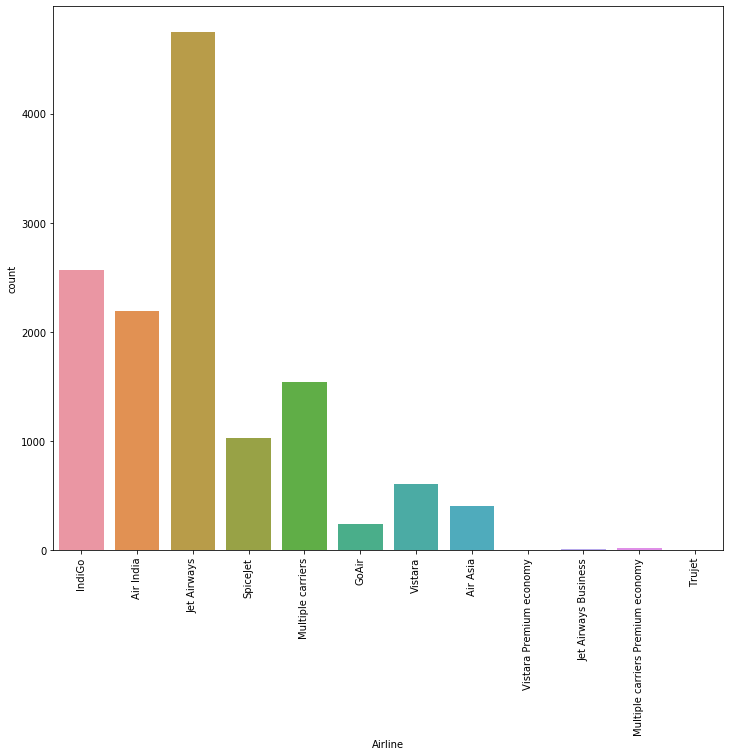

In [112]:
plt.figure(figsize=(12,10))
sns.countplot(x = 'Airline', data = df)
plt.xticks(rotation = 90)

In [113]:
#Most people travel in jet airways

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

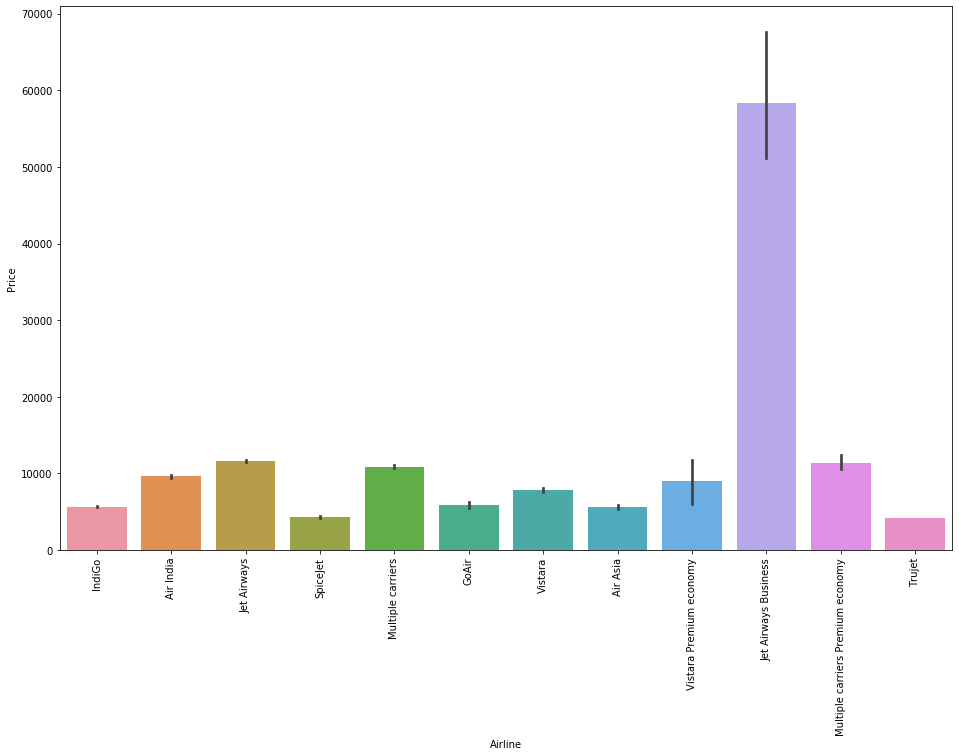

In [103]:
plt.figure(figsize=(16,10))
sns.barplot(x="Airline",y="Price",data=df)
plt.xticks(rotation = 90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text xticklabel objects>)

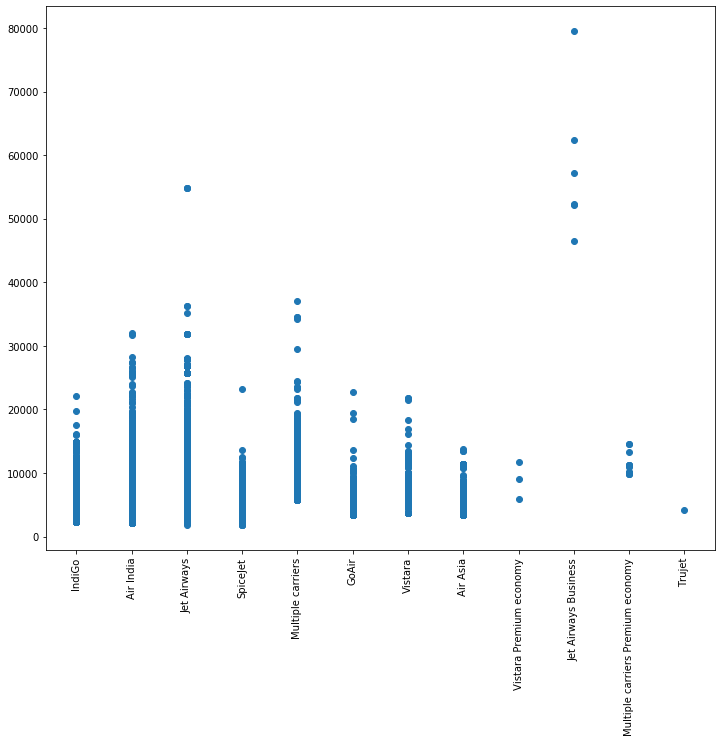

In [110]:
plt.figure(figsize=(12,10))
plt.scatter(x="Airline",y="Price",data=df)
plt.xticks(rotation = 90)

In [104]:
#so basically the price of jet airwayss business is higher

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

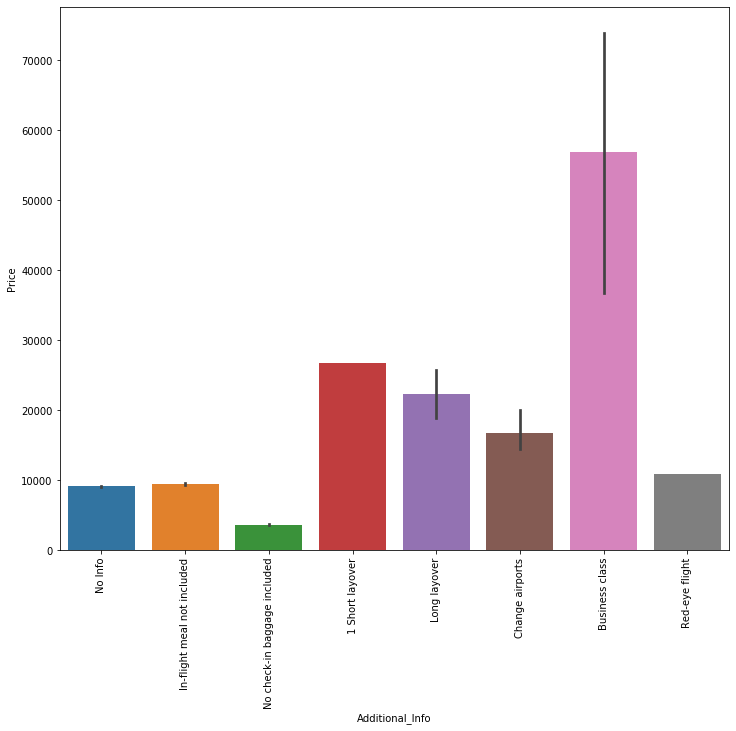

In [109]:
plt.figure(figsize=(12,10))
sns.barplot(x="Additional_Info",y="Price",data=df)
plt.xticks(rotation = 90)

In [106]:
#so basically the price of business class is high

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

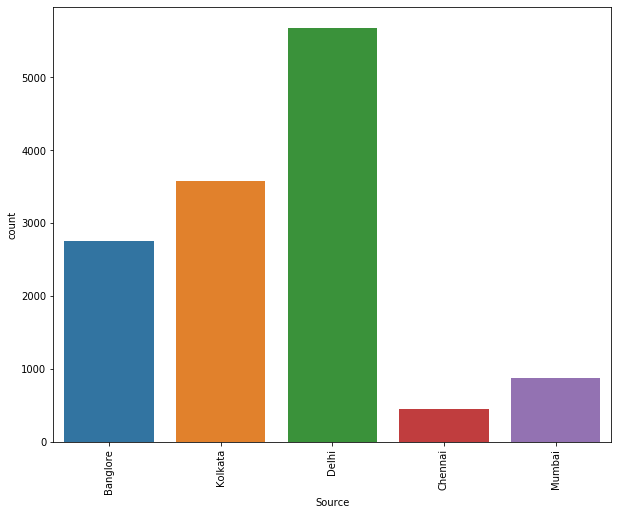

In [116]:
plt.figure(figsize=(10,8))
sns.countplot(x = 'Source', data = df)
plt.xticks(rotation = 90)

In [118]:
#delhi has highest no of passengers

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

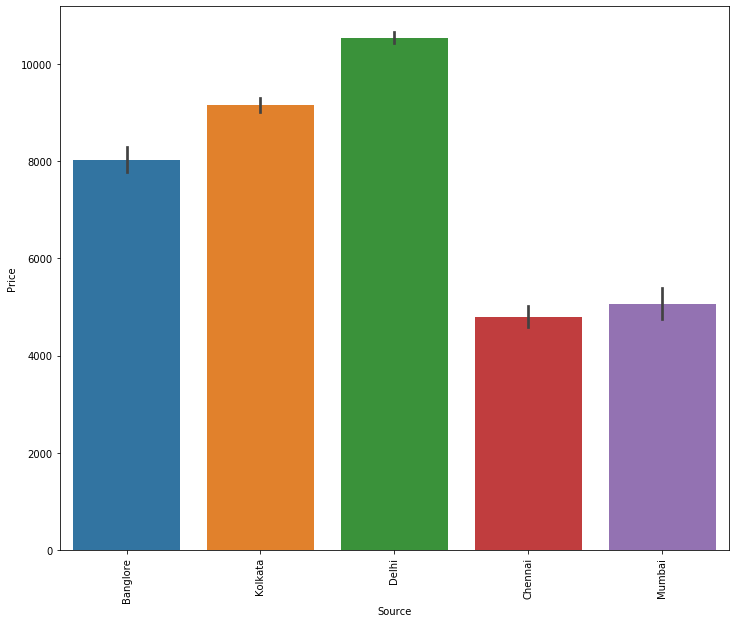

In [114]:
plt.figure(figsize=(12,10))
sns.barplot(x="Source",y="Price",data=df)
plt.xticks(rotation = 90)

In [117]:
#Delhi must be having highest  ticket price for planes and its average ticket price is also highest

In [119]:
#cant check for outliers or skewness cause only one int column is present i.e Price(target)

In [120]:
df["Duration_in_mins"] = pd.to_numeric(df["Duration_in_mins"])

In [121]:
df

,Airline,Source,Destination,Dep_Time,Total_Stops,Additional_Info,Price,source,Duration_in_mins
0,IndiGo,Banglore,Delhi,Night,0,No Info,3897.0,dftrain,170
1,Air India,Kolkata,Banglore,Early Morning,2,No Info,7662.0,dftrain,445
2,Jet Airways,Delhi,Cochin,Morning,2,No Info,13882.0,dftrain,1140
3,IndiGo,Kolkata,Banglore,Evening,1,No Info,6218.0,dftrain,325
4,IndiGo,Banglore,Delhi,Afternoon,1,No Info,13302.0,dftrain,285
...,...,...,...,...,...,...,...,...,...
13349,Air India,Kolkata,Banglore,Night,1,No Info,NaN,dftest,1435
13350,IndiGo,Kolkata,Banglore,Afternoon,0,No Info,NaN,dftest,155
13351,Jet Airways,Delhi,Cochin,Night,1,No Info,NaN,dftest,395
13352,Air India,Delhi,Cochin,Early Morning,1,No Info,NaN,dftest,915


# Machine learing for regression

In [122]:
#lets use one hot encodig to covert object datatypes to integers
dfmain=pd.get_dummies(df,columns=["Additional_Info","Airline","Destination","Source","Total_Stops","Dep_Time"],drop_first=True)


In [123]:
dfmain

,Price,source,Duration_in_mins,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_Long layover,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_Red-eye flight,...,Source_Mumbai,Total_Stops_1,Total_Stops_2,Total_Stops_3,Total_Stops_4,Dep_Time_Early Morning,Dep_Time_Evening,Dep_Time_Late Night,Dep_Time_Morning,Dep_Time_Night
0,3897.0,dftrain,170,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,7662.0,dftrain,445,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
2,13882.0,dftrain,1140,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,6218.0,dftrain,325,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
4,13302.0,dftrain,285,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13349,NaN,dftest,1435,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
13350,NaN,dftest,155,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
13351,NaN,dftest,395,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
13352,NaN,dftest,915,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0


In [125]:
df_train=dfmain.loc[dfmain["source"]=="dftrain"]
df_test=dfmain.loc[dfmain["source"]=="dftest"]

In [126]:
#re indexing the test dataset
df_test.reset_index(drop=True,inplace=True)

In [127]:
#droping "Price" and "source" columns from the test dataset
#Also droping "source" columns from the train dataset
df_test.drop(columns=["Price","source"],inplace=True)
df_train.drop(columns=["source"],inplace=True)

In [128]:
# divide the df_train into iput and output
df_x=df_train.drop(columns=["Price"])
y=df_train[["Price"]]

In [129]:
#let's bring the features to same scale
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(df_x)
x=sc.transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [151]:
#pca
#Lets use PCA for dimensionality reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=29)
x_pca=pca.fit_transform(x)
print("variance :{}".format(np.sum(pca.explained_variance_ratio_)))

variance :0.995346746331972


In [131]:
#to find random stat which gives maximum r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,df_x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2 score corresponding to ",r_state," is ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [146]:
#lets make a function which evaluates the model using cross_val_score
from sklearn.model_selection import cross_val_score
def model_evaluation(model,x,y):
    c_scores=cross_val_score(model,x,y,cv=5,scoring="r2")
    print("Mean r2 score for regressor: ",c_scores.mean())
    print("standard deviation in r2 score for regressor: ",c_scores.std())
    print(c_scores)

In [154]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
gb_reg=GradientBoostingRegressor()
reg = GridSearchCV(gb_reg, parameters, cv=5,scoring="r2")
reg.fit(x_pca,y)
reg.best_params_

{'learning_rate': 0.1, 'n_estimators': 500}

In [156]:
gb_reg=GradientBoostingRegressor(learning_rate=0.1,n_estimators=1000)
maxr2_score(gb_reg,x_pca,y)

r2 score corresponding to  42  is  0.6748924945798558
r2 score corresponding to  43  is  0.7624157958826665
r2 score corresponding to  44  is  0.7123144445916916
r2 score corresponding to  45  is  0.6926056110699512
r2 score corresponding to  46  is  0.7061273359673264
r2 score corresponding to  47  is  0.736390920570517
r2 score corresponding to  48  is  0.7730367446923556
r2 score corresponding to  49  is  0.7019303668403183
r2 score corresponding to  50  is  0.6918414791146285
r2 score corresponding to  51  is  0.7629050806740199
r2 score corresponding to  52  is  0.6933117425369575
r2 score corresponding to  53  is  0.6888012995690871
r2 score corresponding to  54  is  0.6447087128520514
r2 score corresponding to  55  is  0.7084143520169462
r2 score corresponding to  56  is  0.7201092830495839
r2 score corresponding to  57  is  0.7326646022067522
r2 score corresponding to  58  is  0.7528512818194726
r2 score corresponding to  59  is  0.7254710682856407
r2 score corresponding to  60

48

In [155]:
print("GradientBoosting Regressor\n\n")
model_evaluation(gb_reg,x_pca,y)

GradientBoosting Regressor


Mean r2 score for regressor:  0.7152929440221589
standard deviation in r2 score for regressor:  0.015571511416924195
[0.68660705 0.72294864 0.71131848 0.72668689 0.72890365]


In [150]:
# Random forest using n_estimators=500 
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=500)
maxr2_score(rfr,x_pca,y)

r2 score corresponding to  42  is  0.7160267584008665
r2 score corresponding to  43  is  0.6744616359062237
r2 score corresponding to  44  is  0.7190888529088972
r2 score corresponding to  45  is  0.6973130891009842
r2 score corresponding to  46  is  0.7256069585868457
r2 score corresponding to  47  is  0.7286117568876787
r2 score corresponding to  48  is  0.7535165421690948
r2 score corresponding to  49  is  0.6996137546735428
r2 score corresponding to  50  is  0.6898046768549834
r2 score corresponding to  51  is  0.7538739407988296
r2 score corresponding to  52  is  0.7197283404784649
r2 score corresponding to  53  is  0.6100589411732704
r2 score corresponding to  54  is  0.6884541982746775
r2 score corresponding to  55  is  0.7024734938579431
r2 score corresponding to  56  is  0.7217764767394668
r2 score corresponding to  57  is  0.6539887163335973
r2 score corresponding to  58  is  0.694193920418751
r2 score corresponding to  59  is  0.69458631117485
r2 score corresponding to  60  

79

In [152]:
#cross_val_score for Random Forest Regressor
print("Random Forest Regressor\n\n")
model_evaluation(rfr,x_pca,y)

Random Forest Regressor


Mean r2 score for regressor:  0.7167470281719563
standard deviation in r2 score for regressor:  0.010513262045441904
[0.69948566 0.71027881 0.7212769  0.72434484 0.72834893]


In [157]:
from sklearn.svm import SVR
svr=SVR()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svr, parameters, cv=5,scoring="r2")
clf.fit(x_pca,y)
clf.best_params_

{'C': 10, 'kernel': 'linear'}

In [158]:
svr=SVR(C=10,kernel="linear")
maxr2_score(svr,x_pca,y)

r2 score corresponding to  42  is  0.589664785343106
r2 score corresponding to  43  is  0.6392015257413801
r2 score corresponding to  44  is  0.5701336342900614
r2 score corresponding to  45  is  0.5425454943367249
r2 score corresponding to  46  is  0.5795353623114954
r2 score corresponding to  47  is  0.5478393548400551
r2 score corresponding to  48  is  0.6074226851489285
r2 score corresponding to  49  is  0.5672233225942676
r2 score corresponding to  50  is  0.5439892391237087
r2 score corresponding to  51  is  0.6329434902111553
r2 score corresponding to  52  is  0.562559307507384
r2 score corresponding to  53  is  0.609361235406505
r2 score corresponding to  54  is  0.5827686353826296
r2 score corresponding to  55  is  0.5321679480816444
r2 score corresponding to  56  is  0.5864909627235874
r2 score corresponding to  57  is  0.6406846621415432
r2 score corresponding to  58  is  0.6491650694178529
r2 score corresponding to  59  is  0.5607735350891108
r2 score corresponding to  60  

58

In [159]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
parameters = {"n_neighbors":range(2,30)}
clf = GridSearchCV(knr, parameters, cv=5,scoring="r2")
clf.fit(x_pca, y)
clf.best_params_

{'n_neighbors': 5}

In [160]:
knr=KNeighborsRegressor(n_neighbors=5)
maxr2_score(knr,x_pca,y)

r2 score corresponding to  42  is  0.7200479361664457
r2 score corresponding to  43  is  0.7365779781056194
r2 score corresponding to  44  is  0.7111147140602981
r2 score corresponding to  45  is  0.6948813079207419
r2 score corresponding to  46  is  0.7019777096755926
r2 score corresponding to  47  is  0.7149000553241878
r2 score corresponding to  48  is  0.7287640930956187
r2 score corresponding to  49  is  0.6946235023829105
r2 score corresponding to  50  is  0.6997139630029412
r2 score corresponding to  51  is  0.7563568340077439
r2 score corresponding to  52  is  0.7191109996664002
r2 score corresponding to  53  is  0.6755733051622664
r2 score corresponding to  54  is  0.699947576838346
r2 score corresponding to  55  is  0.6800666947013672
r2 score corresponding to  56  is  0.6909422987299192
r2 score corresponding to  57  is  0.6919710568138713
r2 score corresponding to  58  is  0.7504109171700192
r2 score corresponding to  59  is  0.7078329849076767
r2 score corresponding to  60

77

In [164]:
#lets choose our final model
#gradient boost

In [162]:
x_train, x_test, y_train, y_test = train_test_split(x_pca, y,random_state = 48,test_size=0.20)
gb_reg=GradientBoostingRegressor(learning_rate=0.1,n_estimators=500)
gb_reg.fit(x_train,y_train)
y_pred=gb_reg.predict(x_test)

In [163]:
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred))

RMSE is:  2382.1703384602065
r2_score is:  0.7715041418564327
